# Ссылка на датасет
https://www.kaggle.com/datasets/zygmunt/goodbooks-10k

Работу выполнила Стаськова Анна 0392

In [1]:
#чтобы всё работало, нужно вот это
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise  import cosine_distances

In [2]:
#выводим таблицу книги
book_data = pd.read_csv('C:/Users/user/Downloads/ой/books.csv')
book_data.head(10)

id   book_id  best_book_id   work_id  books_count        isbn  \
0   1   2767052       2767052   2792775          272   439023483   
1   2         3             3   4640799          491   439554934   
2   3     41865         41865   3212258          226   316015849   
3   4      2657          2657   3275794          487    61120081   
4   5      4671          4671    245494         1356   743273567   
5   6  11870085      11870085  16827462          226   525478817   
6   7      5907          5907   1540236          969   618260307   
7   8      5107          5107   3036731          360   316769177   
8   9       960           960   3338963          311  1416524797   
9  10      1885          1885   3060926         3455   679783261   

         isbn13                      authors  original_publication_year  \
0  9.780439e+12              Suzanne Collins                     2008.0   
1  9.780440e+12  J.K. Rowling, Mary GrandPré                     1997.0   
2  9.780316e+12              Stephenie Meyer                     2005.0   
3  9.780061e+12                   Harper Lee                     1960.0   
4  9.780743e+12          F. Scott Fitzgerald                     1925.0   
5  9.780525e+12                   John Green                     2012.0   
6  9.780618e+12               J.R.R. Tolkien                     1937.0   
7  9.780317e+12                J.D. Salinger                     1951.0   
8  9.781417e+12                    Dan Brown                     2000.0   
9  9.780680e+12                  Jane Austen                     1813.0   

                             original_title  ... ratings_count  \
0                          The Hunger Games  ...       4780653   
1  Harry Potter and the Philosopher's Stone  ...       4602479   
2                                  Twilight  ...       3866839   
3                     To Kill a Mockingbird  ...       3198671   
4                          The Great Gatsby  ...       2683664   
5                    The Fault in Our Stars  ...       2346404   
6        The Hobbit or There and Back Again  ...       2071616   
7                    The Catcher in the Rye  ...       2044241   
8                          Angels & Demons   ...       2001311   
9                       Pride and Prejudice  ...       2035490   

  work_ratings_count  work_text_reviews_count  ratings_1  ratings_2  \
0            4942365                   155254      66715     127936   
1            4800065                    75867      75504     101676   
2            3916824                    95009     456191     436802   
3            3340896                    72586      60427     117415   
4            2773745                    51992      86236     197621   
5            2478609                   140739      47994      92723   
6            2196809                    37653      46023      76784   
7            2120637                    44920     109383     185520   
8            2078754                    25112      77841     145740   
9            2191465                    49152      54700      86485   

   ratings_3  ratings_4  ratings_5  \
0     560092    1481305    2706317   
1     455024    1156318    3011543   
2     793319     875073    1355439   
3     446835    1001952    1714267   
4     606158     936012     947718   
5     327550     698471    1311871   
6     288649     665635    1119718   
7     455042     661516     709176   
8     458429     716569     680175   
9     284852     609755    1155673   

                                           image_url  \
0  https://images.gr-assets.com/books/1447303603m...   
1  https://images.gr-assets.com/books/1474154022m...   
2  https://images.gr-assets.com/books/1361039443m...   
3  https://images.gr-assets.com/books/1361975680m...   
4  https://images.gr-assets.com/books/1490528560m...   
5  https://images.gr-assets.com/books/1360206420m...   
6  https://images.gr-assets.com/books/1372847500m...   
7  https://images.gr-assets.com/books/1398034300m...

<AxesSubplot: >

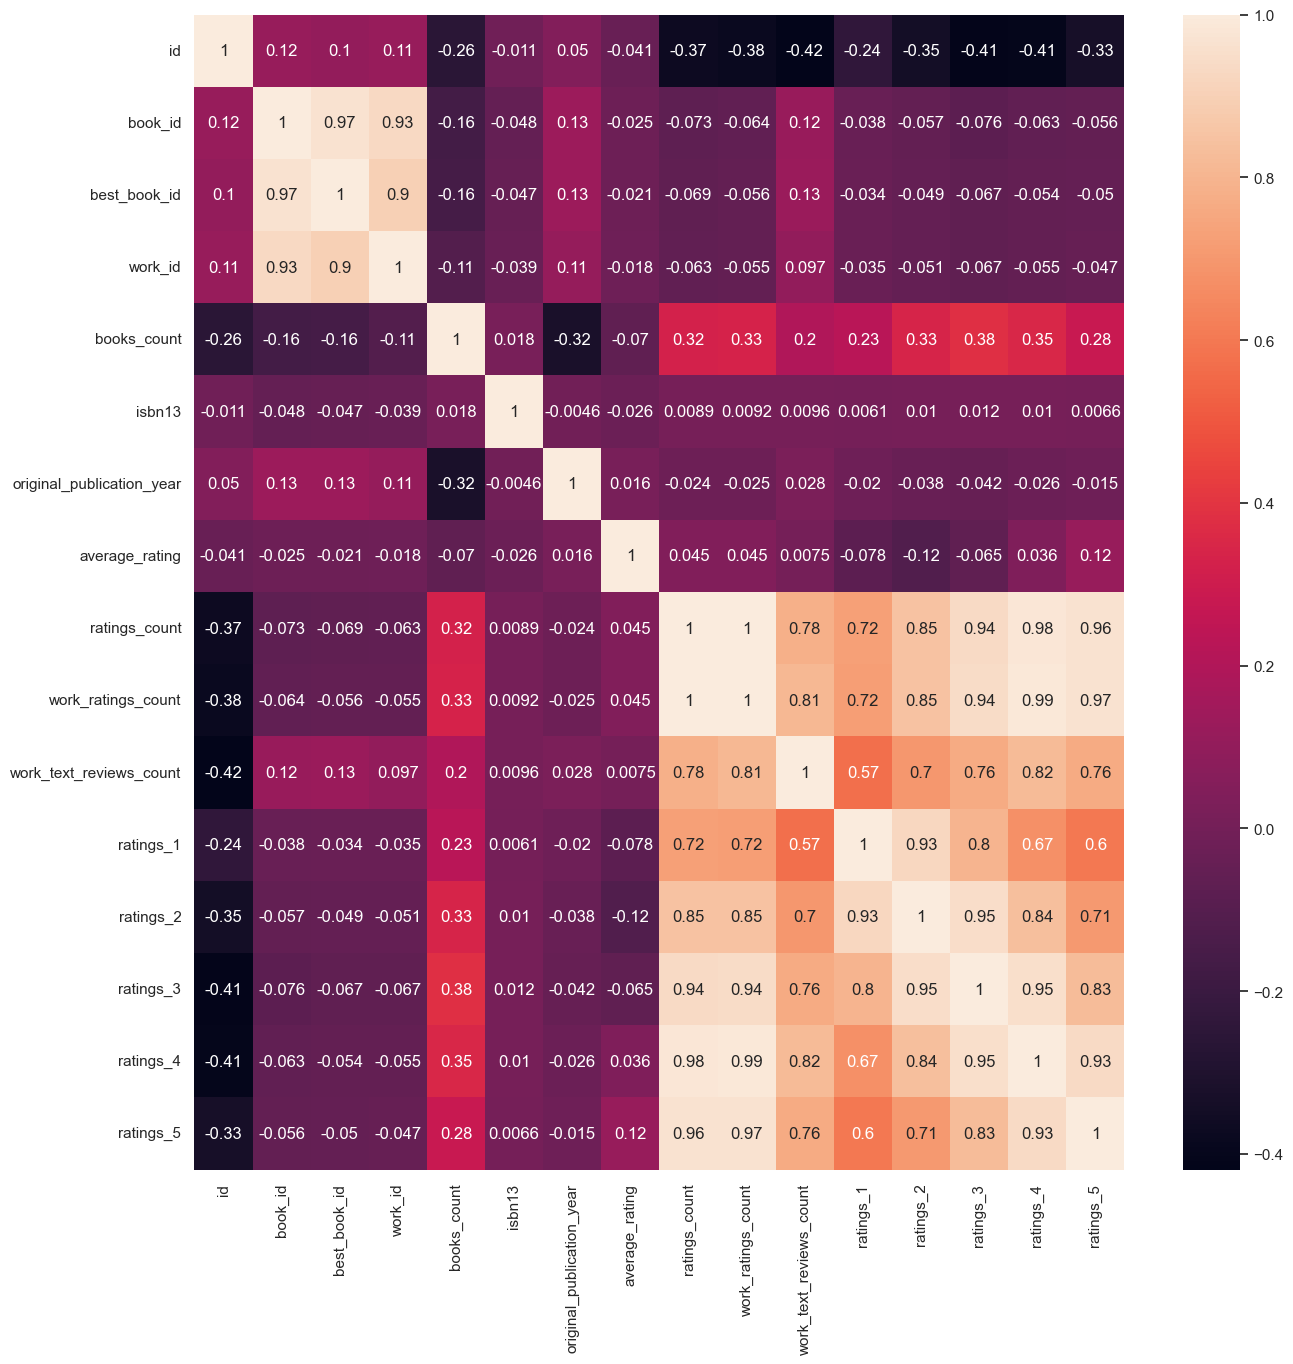

In [7]:
#Корреляция между признаками
corr_matrix = book_data.corr(numeric_only = True)
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(corr_matrix, annot=True)

In [8]:
#выводим колонки
print(book_data.shape)
print(book_data.columns.values)

(10000, 23)
['id' 'book_id' 'best_book_id' 'work_id' 'books_count' 'isbn' 'isbn13'
 'authors' 'original_publication_year' 'original_title' 'title'
 'language_code' 'average_rating' 'ratings_count' 'work_ratings_count'
 'work_text_reviews_count' 'ratings_1' 'ratings_2' 'ratings_3' 'ratings_4'
 'ratings_5' 'image_url' 'small_image_url']


In [11]:
#выводим таблицу рейтинг
ratings = pd.read_csv('C:/Users/user/Downloads/ой/ratings.csv')
ratings.rename(columns = {'book_id':'id'}, inplace = True ) #важно, тк в первой таблице это именно id
ratings.head(5)

id  user_id  rating
0   1      314       5
1   1      439       3
2   1      588       5
3   1     1169       4
4   1     1185       4

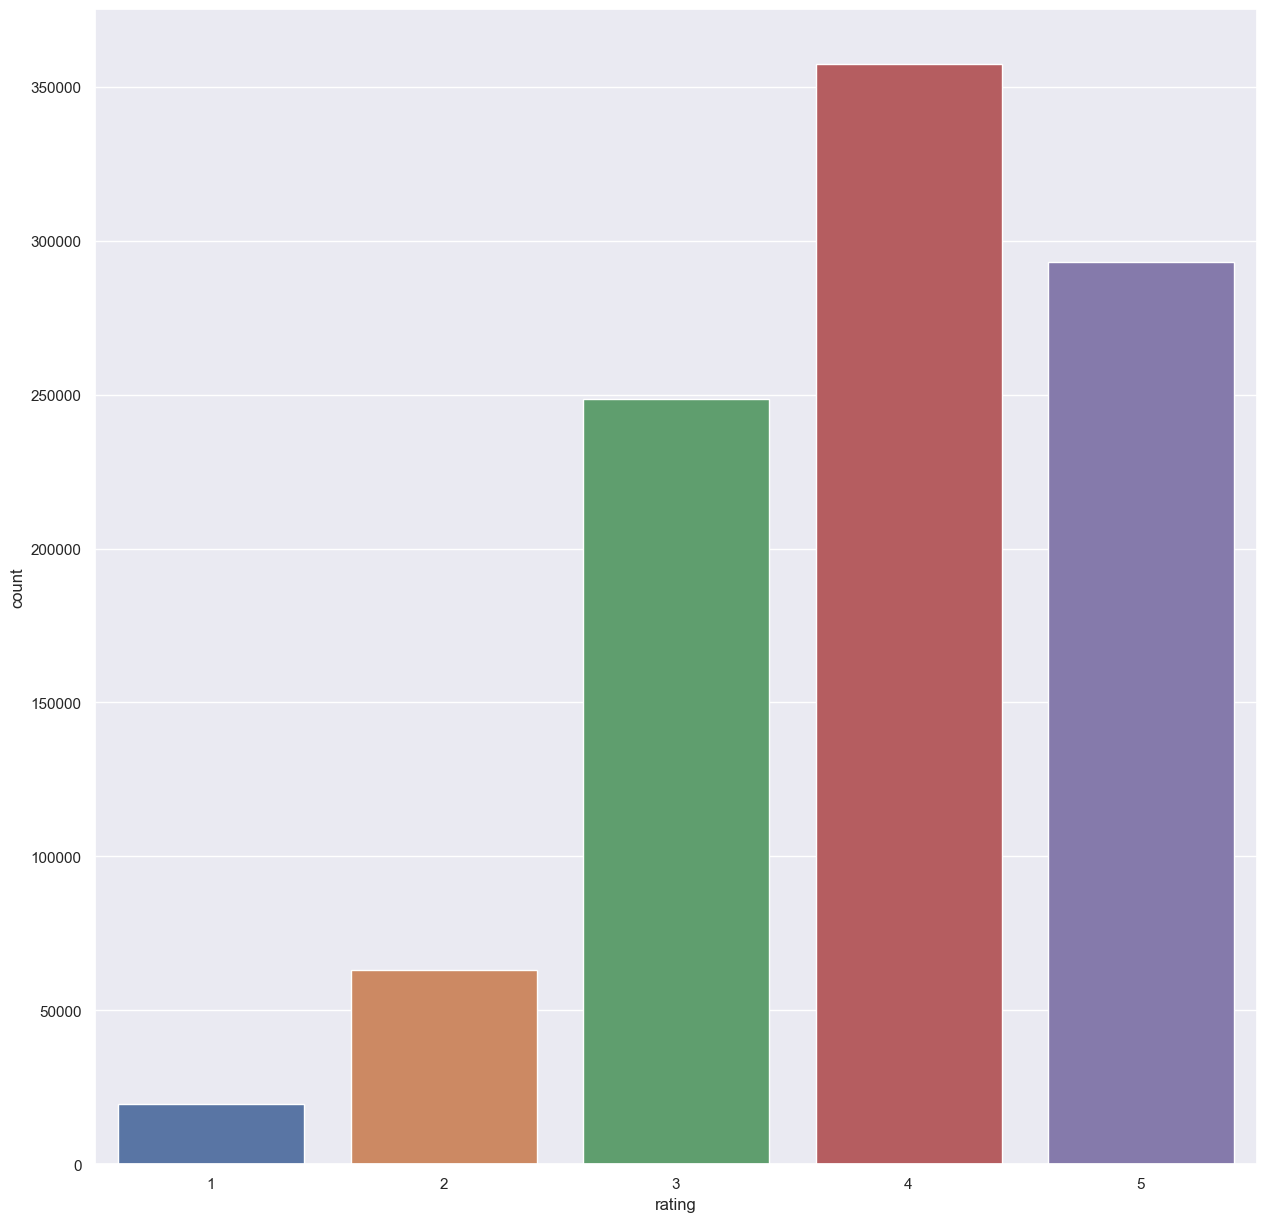

In [12]:
#наглядно показываем рейтинг
sns.countplot(x=ratings['rating'], data=ratings);

In [13]:
MRPU = ratings.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['id','rating'],axis=1, inplace=True)
#среднее значение

In [14]:
MRPU.head()

user_id  mean_rating
0        1     3.666667
1        2     4.333333
2        3     1.000000
3        4     4.000000
4        5     4.200000

In [15]:
#топ 12 книг по рейтингу
top_12_books = book_data[book_data['ratings_count']>1900000].sort_values(by = 'ratings_count', ascending = False).head(50)
top_12_books['original_title']

0                                      The Hunger Games
1              Harry Potter and the Philosopher's Stone
2                                              Twilight
3                                 To Kill a Mockingbird
4                                      The Great Gatsby
5                                The Fault in Our Stars
6                    The Hobbit or There and Back Again
7                                The Catcher in the Rye
9                                   Pride and Prejudice
8                                      Angels & Demons 
14    Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...
12                                 Nineteen Eighty-Four
11                                            Divergent
Name: original_title, dtype: object

<AxesSubplot: xlabel='mean_rating', ylabel='original_title'>

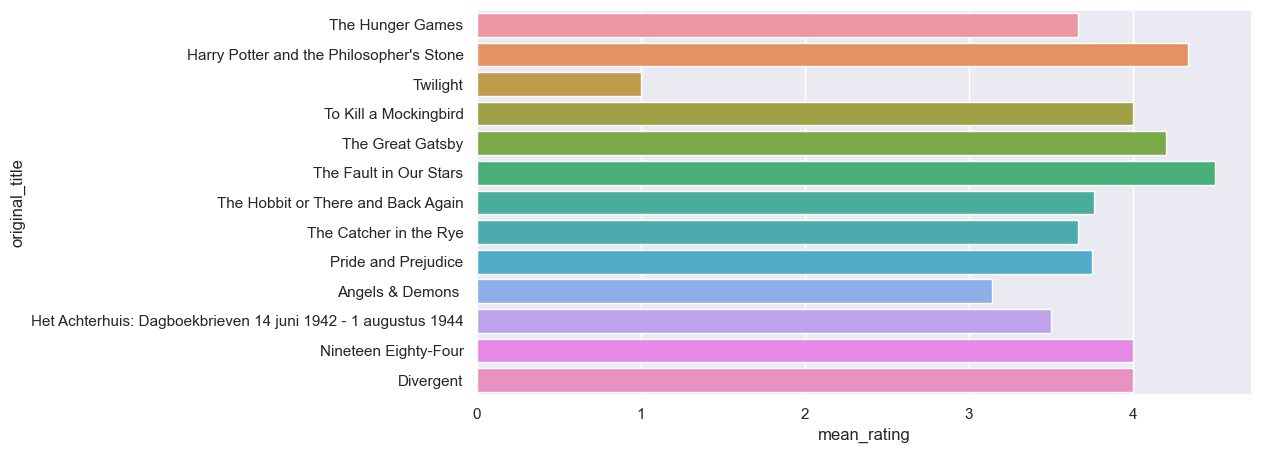

In [16]:
#наглядно про 12 книг
plt.figure(figsize =(10,5))
sns.barplot( y =top_12_books['original_title'] ,x = MRPU['mean_rating'])

In [17]:
#выводим топ 10 авторов
book_Aut = book_data.groupby('authors')['original_title'].count().reset_index().sort_values('original_title',ascending =False).head(10)
book_Aut

authors  original_title
4128     Stephen King              59
3387     Nora Roberts              59
1024      Dean Koontz              45
4288  Terry Pratchett              42
39    Agatha Christie              39
3100        Meg Cabot              37
1963  James Patterson              36
973    David Baldacci              33
1859        J.D. Robb              33
2267     John Grisham              32

<AxesSubplot: title={'center': 'TOP 10 AUTHORS'}, xlabel='original_title', ylabel='authors'>

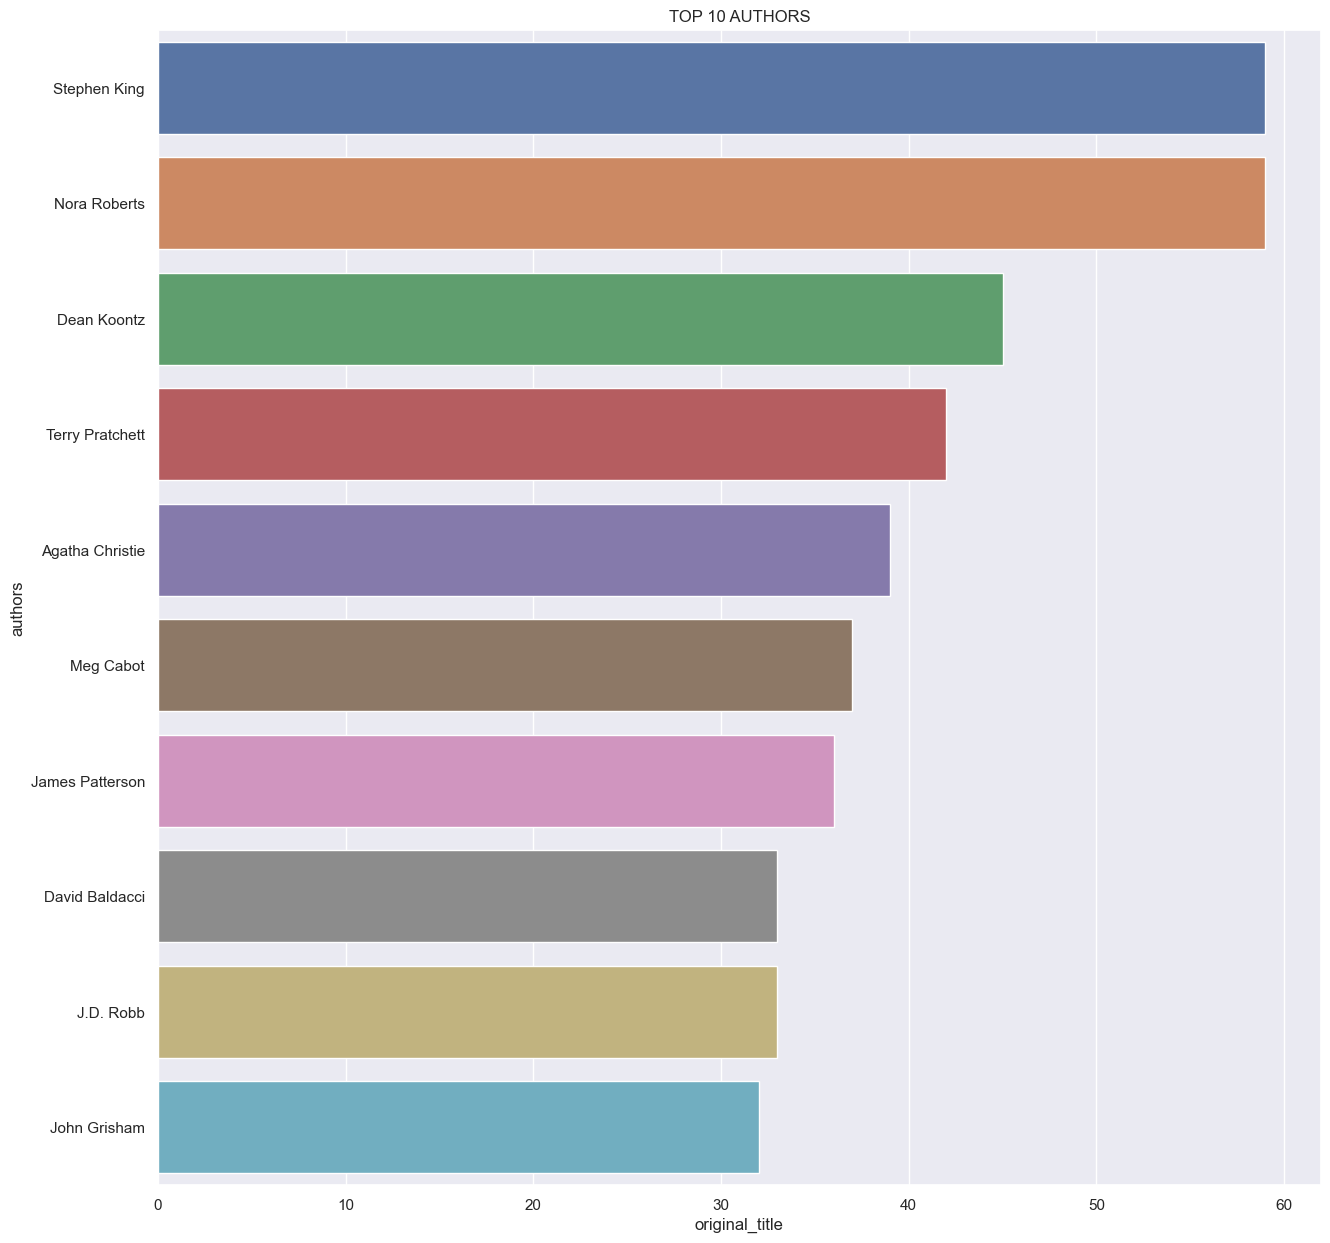

In [18]:
# топ 10 авторов наглядно
plt.title("TOP 10 AUTHORS")
sns.barplot(y =book_Aut['authors'] ,x=book_Aut['original_title'])

Давайте узнаем рейтинг разных юзеров

In [19]:
ratings[ratings['user_id']== 1].head()

id  user_id  rating
117889  1180        1       4
488112  4893        1       3
625717  6285        1       4

In [20]:
ratings[ratings['user_id']== 2].head()

id  user_id  rating
796318  8034        2       4
875008  8855        2       5
959821  9762        2       4

In [21]:
ratings[ratings['user_id']== 5].head()

id  user_id  rating
481723  4829        5       3
661206  6646        5       4
666861  6703        5       4
743500  7487        5       5
799945  8072        5       5

In [22]:
#выводим количество пользователей
ratings['user_id']. nunique ()

53424

In [23]:
#а так же количество книг
ratings['id']. nunique ()

10000

In [24]:
# создадим таблицу из трех столбцов 
data = ratings[['user_id', 'id', 'rating']]
data.head()

user_id  id  rating
0      314   1       5
1      439   1       3
2      588   1       5
3     1169   1       4
4     1185   1       4

начнем работу по нашему 

In [25]:

info = data.groupby(['id', 'rating']).size()
inf = info.to_frame()
inf

0
id    rating    
1     1        2
      2        2
      3       12
      4       38
      5       46
...           ..
10000 1        1
      2        2
      3       20
      4       46
      5       27

[46784 rows x 1 columns]

In [26]:
df = ratings.merge(book_data[["id","title"]], how="left", on="id")
df.head(300)

id  user_id  rating                                    title
0     1      314       5  The Hunger Games (The Hunger Games, #1)
1     1      439       3  The Hunger Games (The Hunger Games, #1)
2     1      588       5  The Hunger Games (The Hunger Games, #1)
3     1     1169       4  The Hunger Games (The Hunger Games, #1)
4     1     1185       4  The Hunger Games (The Hunger Games, #1)
..   ..      ...     ...                                      ...
295   3    50133       5                  Twilight (Twilight, #1)
296   3    51166       3                  Twilight (Twilight, #1)
297   3    51460       2                  Twilight (Twilight, #1)
298   3    52036       1                  Twilight (Twilight, #1)
299   3    53292       5                  Twilight (Twilight, #1)

[300 rows x 4 columns]

In [27]:
k = df.user_id.value_counts()
df = df[df.user_id.isin(k[k > 10].index)]

In [28]:
book_pivot = df.pivot_table(columns='user_id', index={'title', 'id'}, values="rating", ) # кластеризуем КНИГИ (?)
book_pivot.fillna(0, inplace=True)
book_pivot

user_id                                                   7      10     19     \
id    title                                                                     
1     The Hunger Games (The Hunger Games, #1)               0.0    0.0    0.0   
2     Harry Potter and the Sorcerer's Stone (Harry Po...    0.0    0.0    0.0   
3     Twilight (Twilight, #1)                               0.0    0.0    0.0   
4     To Kill a Mockingbird                                 0.0    0.0    0.0   
5     The Great Gatsby                                      0.0    0.0    0.0   
...                                                         ...    ...    ...   
9996  Bayou Moon (The Edge, #2)                             0.0    0.0    0.0   
9997  Means of Ascent (The Years of Lyndon Johnson, #2)     0.0    0.0    0.0   
9998  The Mauritius Command                                 0.0    0.0    0.0   
9999  Cinderella Ate My Daughter: Dispatches from the...    0.0    0.0    0.0   
10000 The First World War                                   0.0    0.0    0.0   

user_id                                                   22     23     24     \
id    title                                                                     
1     The Hunger Games (The Hunger Games, #1)               0.0    0.0    0.0   
2     Harry Potter and the Sorcerer's Stone (Harry Po...    0.0    0.0    0.0   
3     Twilight (Twilight, #1)                               0.0    0.0    0.0   
4     To Kill a Mockingbird                                 0.0    0.0    0.0   
5     The Great Gatsby                                      0.0    0.0    0.0   
...                                                         ...    ...    ...   
9996  Bayou Moon (The Edge, #2)                             0.0    0.0    0.0   
9997  Means of Ascent (The Years of Lyndon Johnson, #2)     0.0    0.0    0.0   
9998  The Mauritius Command                                 0.0    0.0    0.0   
9999  Cinderella Ate My Daughter: Dispatches from the...    0.0    0.0    0.0   
10000 The First World War                                   0.0    0.0    0.0   

user_id                                                   25     27     35     \
id    title                                                                     
1     The Hunger Games (The Hunger Games, #1)               0.0    0.0    0.0   
2     Harry Potter and the Sorcerer's Stone (Harry Po...    0.0    0.0    0.0   
3     Twilight (Twilight, #1)                               0.0    0.0    0.0   
4     To Kill a Mockingbird                                 0.0    0.0    0.0   
5     The Great Gatsby                                      0.0    0.0    0.0   
...                                                         ...    ...    ...   
9996  Bayou Moon (The Edge, #2)                             0.0    0.0    0.0   
9997  Means of Ascent (The Years of Lyndon Johnson, #2)     0.0    0.0    0.0   
9998  The Mauritius Command                                 0.0    0.0    0.0   
9999  Cinderella Ate My Daughter: Dispatches from the...    0.0    0.0    0.0   
10000 The First World War                                   0.0    0.0    0.0   

user_id                                                   36     ...  53388  \
id    title                                                      ...          
1     The Hunger Games (The Hunger Games, #1)               0.0  ...    0.0   
2     Harry Potter and the Sorcerer's Stone (Harry Po...    0.0  ...    0.0   
3     Twilight (Twilight, #1)                               0.0  ...    0.0   
4     To Kill a Mockingbird                                 0.0  ...    0.0   
5     The Great Gatsby                                      0.0  ...    0.0   
...                                                         ...  ...    ...   
9996  Bayou Moon (The Edge, #2)                             0.0  ...    0.0   
9997  Means of Ascent (The Years of Lyndon Johnson, #2)     0.0  ...    0.0   
9998  The Mauritius Command                     

In [29]:
#X_train, X_test = train_test_split(book_pivot, test_size = 0.6)
X_train = book_pivot
import scipy.sparse as sparse
X = sparse.coo_matrix(X_train)

KMeans просто для примера раскраски

In [30]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=40, random_state=42).fit(X)
cl_kmeans = kmeans.labels_

In [33]:
from sklearn.manifold import TSNE
import plotly.express as px
from sklearn.decomposition import PCA
X_tsne = TSNE(n_components = 2, perplexity=140, verbose=1).fit_transform(X)
#X_pca = PCA().fit_transform(matrix)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 421 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...
[t-SNE] Computed neighbors for 10000 samples in 3.481s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 10.226722
[t-SNE] KL divergence after 250 iterations with early exaggeration: 122.797623
[t-SNE] KL divergence after 1000 iterations: 3.260996


In [34]:
fig = px.scatter(
    X_tsne, x=0, y=1,
    color=cl_kmeans
)
fig.show()

In [35]:
#X_tsne3D8 = TSNE(n_components = 3, perplexity=300, verbose=1).fit_transform(X)
#X_tsne3D9 = TSNE(n_components = 3, perplexity=250, verbose=1).fit_transform(X)
#X_tsne3D1 = TSNE(n_components = 3, perplexity=200, verbose=1).fit_transform(X)

X_tsne3D = TSNE(n_components = 3, perplexity=140, verbose=1).fit_transform(X)

#X_tsne3D2 = TSNE(n_components = 3, perplexity=100, verbose=1).fit_transform(X)
#X_tsne3D3 = TSNE(n_components = 3, perplexity=70, verbose=1).fit_transform(X)
#X_tsne3D4 = TSNE(n_components = 3, perplexity=60, verbose=1).fit_transform(X)
#X_tsne3D5 = TSNE(n_components = 3, perplexity=50, verbose=1).fit_transform(X)
#X_tsne3D6 = TSNE(n_components = 3, perplexity=30, verbose=1).fit_transform(X)
#X_tsne3D7 = TSNE(n_components = 3, perplexity=10, verbose=1).fit_transform(X)

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 421 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.016s...
[t-SNE] Computed neighbors for 10000 samples in 3.368s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 10.226722
[t-SNE] KL divergence after 250 iterations with early exaggeration: 169.796799
[t-SNE] KL divergence after 1000 iterations: 4.885713


In [48]:
fig = px.scatter_3d(
    X_tsne3D, x=0, y=1, z=2,
    color=cl_dbscan
)
fig.update_traces(marker_size=6)
fig.show()

In [38]:
from sklearn.cluster import DBSCAN
from collections import Counter
clusters = DBSCAN(eps=7e-6, min_samples=10, metric = 'cosine').fit(X_tsne)
cl_dbscan = clusters.labels_
Counter(cl_dbscan)

Counter({0: 196,
         73: 18,
         -1: 1103,
         1: 23,
         2: 12,
         207: 9,
         3: 12,
         4: 26,
         22: 20,
         5: 21,
         6: 146,
         7: 24,
         8: 48,
         9: 134,
         99: 15,
         55: 10,
         10: 18,
         11: 21,
         12: 341,
         13: 67,
         14: 135,
         15: 746,
         24: 71,
         16: 16,
         17: 26,
         18: 194,
         19: 21,
         20: 30,
         21: 53,
         36: 38,
         23: 35,
         203: 10,
         25: 14,
         26: 23,
         27: 15,
         28: 43,
         29: 20,
         30: 32,
         39: 139,
         31: 288,
         32: 16,
         33: 90,
         101: 30,
         34: 80,
         35: 144,
         153: 15,
         37: 12,
         38: 63,
         166: 22,
         40: 41,
         51: 40,
         41: 15,
         42: 73,
         178: 13,
         43: 28,
         44: 73,
         110: 34,
         204: 10,
     

визуализируем в 2д

In [40]:
fig = px.scatter(
    X_tsne, x=0, y=1,
    color=cl_dbscan
)
fig.show()

In [41]:
fig = px.scatter(
    X_tsne, x=0, y=1,
    color=cl_kmeans
)
fig.show()

добавляем метки класторов

In [42]:
book_pivot['DBSCAN'] = cl_dbscan
book_pivot['KMeans'] = cl_kmeans
book_pivot
#book_pivot['title'] = set(df['title'].tolist())

user_id                                                     7   10   19   22  \
id    title                                                                    
1     The Hunger Games (The Hunger Games, #1)             0.0  0.0  0.0  0.0   
2     Harry Potter and the Sorcerer's Stone (Harry Po...  0.0  0.0  0.0  0.0   
3     Twilight (Twilight, #1)                             0.0  0.0  0.0  0.0   
4     To Kill a Mockingbird                               0.0  0.0  0.0  0.0   
5     The Great Gatsby                                    0.0  0.0  0.0  0.0   
...                                                       ...  ...  ...  ...   
9996  Bayou Moon (The Edge, #2)                           0.0  0.0  0.0  0.0   
9997  Means of Ascent (The Years of Lyndon Johnson, #2)   0.0  0.0  0.0  0.0   
9998  The Mauritius Command                               0.0  0.0  0.0  0.0   
9999  Cinderella Ate My Daughter: Dispatches from the...  0.0  0.0  0.0  0.0   
10000 The First World War                                 0.0  0.0  0.0  0.0   

user_id                                                    23   24   25   27  \
id    title                                                                    
1     The Hunger Games (The Hunger Games, #1)             0.0  0.0  0.0  0.0   
2     Harry Potter and the Sorcerer's Stone (Harry Po...  0.0  0.0  0.0  0.0   
3     Twilight (Twilight, #1)                             0.0  0.0  0.0  0.0   
4     To Kill a Mockingbird                               0.0  0.0  0.0  0.0   
5     The Great Gatsby                                    0.0  0.0  0.0  0.0   
...                                                       ...  ...  ...  ...   
9996  Bayou Moon (The Edge, #2)                           0.0  0.0  0.0  0.0   
9997  Means of Ascent (The Years of Lyndon Johnson, #2)   0.0  0.0  0.0  0.0   
9998  The Mauritius Command                               0.0  0.0  0.0  0.0   
9999  Cinderella Ate My Daughter: Dispatches from the...  0.0  0.0  0.0  0.0   
10000 The First World War                                 0.0  0.0  0.0  0.0   

user_id                                                    35   36  ...  \
id    title                                                         ...   
1     The Hunger Games (The Hunger Games, #1)             0.0  0.0  ...   
2     Harry Potter and the Sorcerer's Stone (Harry Po...  0.0  0.0  ...   
3     Twilight (Twilight, #1)                             0.0  0.0  ...   
4     To Kill a Mockingbird                               0.0  0.0  ...   
5     The Great Gatsby                                    0.0  0.0  ...   
...                                                       ...  ...  ...   
9996  Bayou Moon (The Edge, #2)                           0.0  0.0  ...   
9997  Means of Ascent (The Years of Lyndon Johnson, #2)   0.0  0.0  ...   
9998  The Mauritius Command                               0.0  0.0  ...   
9999  Cinderella Ate My Daughter: Dispatches from the...  0.0  0.0  ...   
10000 The First World War                                 0.0  0.0  ...   

user_id                                                   53400  53401  53403  \
id    title                                                                     
1     The Hunger Games (The Hunger Games, #1)               0.0    0.0    0.0   
2     Harry Potter and the Sorcerer's Stone (Harry Po...    0.0    0.0    0.0   
3     Twilight (Twilight, #1)                               0.0    0.0    0.0   
4     To Kill a Mockingbird                                 0.0    0.0    0.0   
5     The Great Gatsby                                      0.0    0.0    0.0   
...                                                         ...    ...    ...   
9996  Bayou Moon (The Edge, #2)                             0.0    0.0    0.0   
9997  Means of Ascent (The Years of Lyndon Johnson, #2)     0.0    0.0    0.0   
9998  The Mauritius Command                                 0.0    0.0    0.0   
9999  Cinderella Ate My Daughter: Dispatches from t

In [43]:
# Проверяем книги на приутсвие в списке
'Alice in Wonderland' in df['title'].tolist()

True

Найдем все книги название которых включает "Гарри Поттер и " и проверим расспределило ли их в одну группу (поиск по названию)

In [45]:
HP_list = df[df['title'].str.contains('Harry Potter and the')][['id', 'title']].drop_duplicates(keep='first')['id'].tolist()
HP_list = [i - 1 for i in HP_list]
book_pivot.iloc[HP_list][['DBSCAN', 'KMeans']]

user_id                                                  DBSCAN  KMeans
id   title                                                             
2    Harry Potter and the Sorcerer's Stone (Harry Po...       0      10
18   Harry Potter and the Prisoner of Azkaban (Harry...       0      10
21   Harry Potter and the Order of the Phoenix (Harr...       0      10
23   Harry Potter and the Chamber of Secrets (Harry ...       0      10
24   Harry Potter and the Goblet of Fire (Harry Pott...       0      10
25   Harry Potter and the Deathly Hallows (Harry Pot...       0      10
27   Harry Potter and the Half-Blood Prince (Harry P...       0      10
279  Harry Potter and the Cursed Child - Parts One a...      41       3
3054 Harry Potter and the Chamber of Secrets: Sheet ...     101       0
6141 Harry Potter and the Order of the Phoenix (Harr...      -1       0

Выведем все книги Стефани Майер, чтобы проверить попали ли они в одинаковые группы(поиск по автору)

In [46]:
TL_list = book_data[book_data['authors'].str.contains('Stephenie Meyer')][['id', 'title']].drop_duplicates(keep='first')['id'].tolist()
TL_list = [i - 1 for i in TL_list]
book_pivot.iloc[TL_list][['DBSCAN', 'KMeans']]

user_id                                                  DBSCAN  KMeans
id   title                                                             
3    Twilight (Twilight, #1)                                  0      10
49   New Moon (Twilight, #2)                                  2      10
52   Eclipse (Twilight, #3)                                   2      10
56   Breaking Dawn (Twilight, #4)                             2      10
73   The Host (The Host, #1)                                  4       3
732  The Short Second Life of Bree Tanner: An Eclips...     112       0
834  Midnight Sun (Twilight, #1.5)                           -1       0
992  The Twilight Saga (Twilight, #1-4)                      63       0
1619 The Twilight Saga Complete Collection  (Twiligh...      94      11
2021 The Twilight Collection (Twilight, #1-3)                -1       0
3075 Twilight: The Graphic Novel, Vol. 1 (Twilight: ...      93       0
4088 The Twilight Saga: The Official Illustrated Gui...      81       0
5245 Twilight: The Graphic Novel, Vol. 2  (Twilight:...      -1       0
5296 The Chemist                                             53       0

так же поищем для Сьюзан Коллинз(поиск по автору)

In [47]:
HG_list = book_data[book_data['authors'].str.contains('Suzanne Collins')][['id', 'title']].drop_duplicates(keep='first')['id'].tolist()
HG_list = [i - 1 for i in HG_list]
book_pivot.iloc[HG_list][['DBSCAN', 'KMeans']]

user_id                                                  DBSCAN  KMeans
id   title                                                             
1    The Hunger Games (The Hunger Games, #1)                  0      10
17   Catching Fire (The Hunger Games, #2)                     0      10
20   Mockingjay (The Hunger Games, #3)                        0      10
507  The Hunger Games Trilogy Boxset (The Hunger Gam...      81       3
1531 Gregor the Overlander (Underland Chronicles, #1)        21       0
2935 Gregor and the Code of Claw (Underland Chronicl...     136       0
3179 Gregor and the Curse of the Warmbloods (Underla...     136       0
3712 Gregor and the Prophecy of Bane (Underland Chro...     136       0
4720 Gregor and the Marks of Secret (Underland Chron...     136       0

Вывод:
По этим трем выборкам можно сделать вывод, что рекомендацонная таблица работает, ведь три цикла фентези книг (Гарри Поттер, Сумерки и Голодные игры) попали в одну группу